In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
from zipfile import ZipFile

# specifying the zip file name
file_name = "train.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip_train:
    # printing all the contents of the zip file
    zip_train.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip_train.extractall()
    print('Done!')

Se han truncado las últimas 5000 líneas del flujo de salida.
train/dog/dog.550.jpg                          2024-10-29 18:25:52         4826
train/dog/dog.5500.jpg                         2024-10-29 18:25:52        44699
train/dog/dog.5501.jpg                         2024-10-29 18:25:52        30379
train/dog/dog.5502.jpg                         2024-10-29 18:25:52        25140
train/dog/dog.5503.jpg                         2024-10-29 18:25:52        21938
train/dog/dog.5504.jpg                         2024-10-29 18:25:52         7717
train/dog/dog.5505.jpg                         2024-10-29 18:25:52        26625
train/dog/dog.5506.jpg                         2024-10-29 18:25:52         8554
train/dog/dog.5507.jpg                         2024-10-29 18:25:52        19899
train/dog/dog.5508.jpg                         2024-10-29 18:25:52         9154
train/dog/dog.5509.jpg                         2024-10-29 18:25:52        25600
train/dog/dog.551.jpg                          2024-10-29 1

In [3]:
data_dir = "train"
dog_subfolder = os.path.join(data_dir, "dog")
dog_image_files = os.listdir(dog_subfolder)

In [4]:
dog_images = []
for i in range(9):
  img_dog = os.path.join(dog_subfolder, dog_image_files[i])
  img = Image.open(img_dog)
  img_array = image.img_to_array(img)
  img_array /= 255.0
  dog_images.append(img_array)

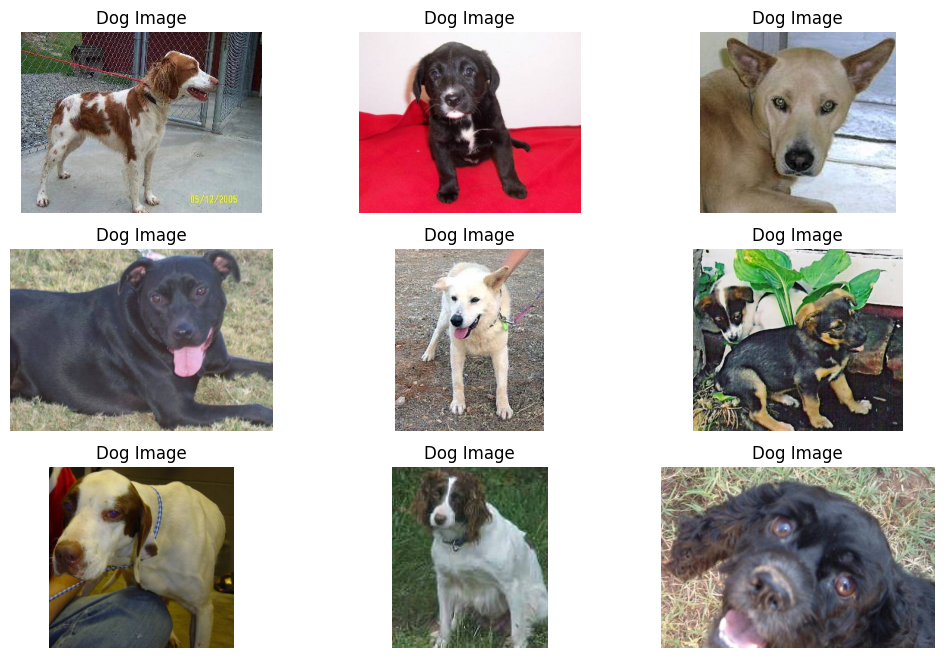

In [5]:
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

In [6]:
cat_subfolder = os.path.join(data_dir, "cat")
cat_image_files = os.listdir(cat_subfolder)

In [7]:
cat_images = []
for i in range(9):
  img_cat = os.path.join(cat_subfolder, cat_image_files[i])
  img = Image.open(img_cat)
  img_array = image.img_to_array(img)
  img_array /= 255.0
  cat_images.append(img_array)

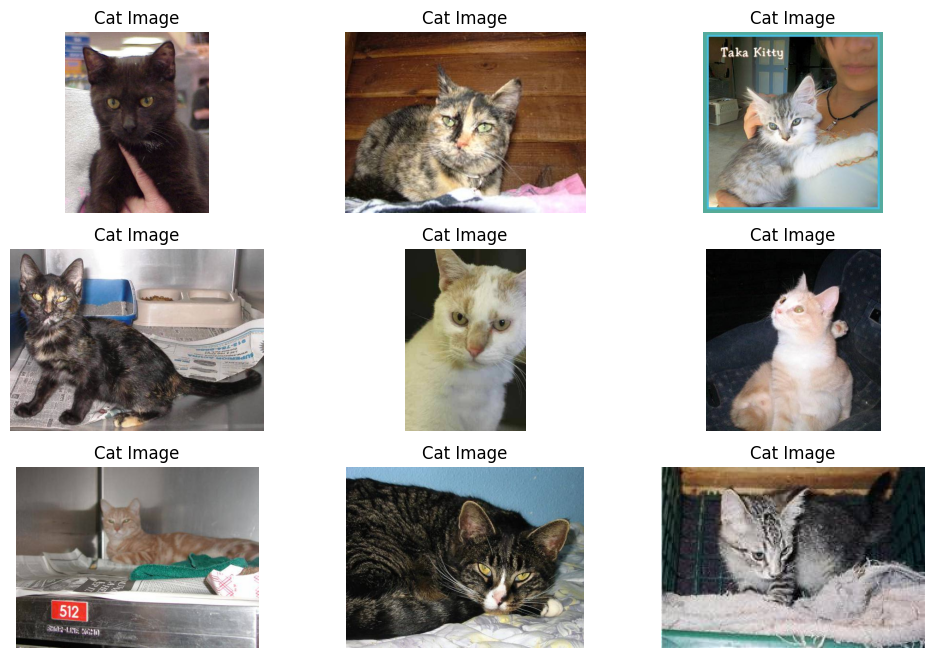

In [8]:
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Cat Image')
    plt.axis('off')

In [9]:
# specifying the zip file name
file_name = "test.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip_test:
    # printing all the contents of the zip file
    zip_test.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip_test.extractall()
    print('Done!')

Se han truncado las últimas 5000 líneas del flujo de salida.
test/test/550.jpg                              2024-10-29 18:11:38        11253
test/test/5500.jpg                             2024-10-29 18:11:38        19488
test/test/5501.jpg                             2024-10-29 18:11:38        14965
test/test/5502.jpg                             2024-10-29 18:11:38        14406
test/test/5503.jpg                             2024-10-29 18:11:38        14957
test/test/5504.jpg                             2024-10-29 18:11:38        15065
test/test/5505.jpg                             2024-10-29 18:11:38         2985
test/test/5506.jpg                             2024-10-29 18:11:38         4349
test/test/5507.jpg                             2024-10-29 18:11:38        27502
test/test/5508.jpg                             2024-10-29 18:11:38        54253
test/test/5509.jpg                             2024-10-29 18:11:38         2312
test/test/551.jpg                              2024-10-29 1

In [26]:
train_dir = "train/"
test_dir = "test/"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ['dog', 'cat'])
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes = ['test'])

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [11]:
model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [27]:
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 50, epochs = 1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 2730s 55s/step - accuracy: 0.5223 - loss: 0.6929


In [33]:
import pickle
pickle.dump(model, open("imacla_pro.keras", "wb"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
cat


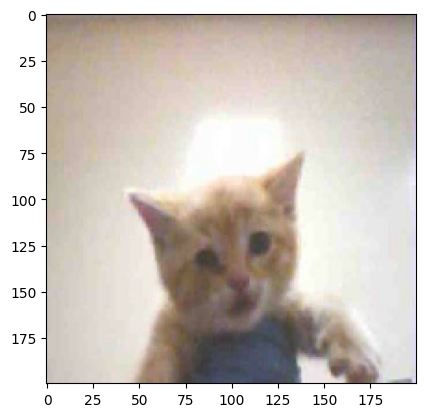

In [36]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("test/test/150.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("imacla_pro.keras")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")